In [2]:
import numpy as np 
import pandas as pd

In [5]:
import sys, os, re, csv, codecs, numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import string
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

In [10]:
train_df = pd.read_csv(r'C:\Users\wwwKa\OneDrive\Desktop\Kaggle 2\applications-of-machine-learning-prml-hackathon-2\train')
test_df = pd.read_csv(r'C:\Users\wwwKa\OneDrive\Desktop\Kaggle 2\applications-of-machine-learning-prml-hackathon-2\test')
train_df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']] = train_df['Prediction'].str.split(',', expand=True)
train_df.drop('Prediction', axis=1, inplace=True)
cols = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
train_df1 = train_df[cols]
for i in cols:
    train_df1[i] = train_df1[i].astype(int)
    train_df[i] = train_df[i].astype(int)
for i in cols:
    print(f'{i} : {train_df1[i].sum()}')

C:\Users\wwwKa\AppData\Local\Temp\ipykernel_2544\1819953493.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df1[i] = train_df1[i].astype(int)


toxic : 10676
severe_toxic : 1087
obscene : 5905
threat : 321
insult : 5523
identity_hate : 967


In [11]:
def lower(text):
    lowercase_text = [word.lower() for word in text.split()]
    text=" ".join(lowercase_text)
    return text

In [12]:
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: lower(x))
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: lower(x))

In [13]:
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = train_df[list_classes].values
list_sentences_train = train_df["comment_text"]
list_sentences_test = test_df["comment_text"]

In [14]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(list_sentences_train))
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)

In [15]:
totalNumWords = [len(one_comment) for one_comment in list_tokenized_train]


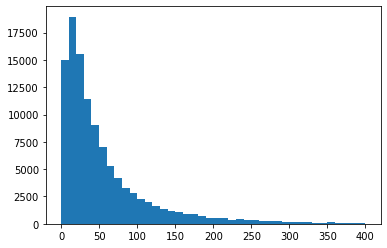

In [16]:
plt.hist(totalNumWords,bins = np.arange(0,410,10))
plt.show()

In [17]:
maxlen = 200
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [18]:
inp = Input(shape=(maxlen, ))


In [19]:
embed_size = 128
x = Embedding(max_features, embed_size)(inp)

In [20]:
x = LSTM(60, return_sequences=True,name='lstm_layer')(x)


In [21]:
x = GlobalMaxPool1D()(x)


In [22]:
x = Dropout(0.1)(x)


In [23]:
x = Dense(50, activation="relu")(x)


In [24]:
x = Dropout(0.1)(x)


In [25]:
x = Dense(6, activation="sigmoid")(x)


In [26]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [27]:
batch_size = 32
epochs = 2
model.fit(X_t,y, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/2
3143/3143 [==============================] - 225s 71ms/step - loss: 0.0786 - accuracy: 0.9488 - val_loss: 0.0508 - val_accuracy: 0.9942
Epoch 2/2
3143/3143 [==============================] - 225s 72ms/step - loss: 0.0463 - accuracy: 0.9863 - val_loss: 0.0477 - val_accuracy: 0.9942


In [30]:
preds = model.predict(X_te, batch_size=1024)


array([[5.4043531e-04, 4.6754090e-07, 7.6143268e-05, 3.1153393e-06,
        3.9814327e-05, 1.5781563e-05],
       [1.2332708e-02, 1.2367272e-05, 7.9202652e-04, 8.7238848e-05,
        1.0291934e-03, 2.5415421e-04],
       [6.0753226e-03, 3.4194463e-06, 6.1988831e-04, 1.7359471e-05,
        6.0567260e-04, 1.4376640e-04],
       ...,
       [1.2628049e-02, 2.0954860e-05, 1.2102425e-03, 1.1903855e-04,
        1.4431179e-03, 4.2489171e-04],
       [4.8645732e-01, 3.1758845e-03, 3.9248168e-02, 1.5057355e-02,
        1.1290339e-01, 3.0172110e-02],
       [1.3493401e-01, 3.9860606e-04, 9.0259612e-03, 2.3269355e-03,
        2.1527201e-02, 5.0093532e-03]], dtype=float32)